###Mounting the drive

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Run the fast ai based methods

In [39]:
!pip install "torch==1.4" "torchvision==0.5.0" 

###Importing all the required libraries

In [40]:
import numpy as np
import pandas as pd

import os
import random
import shutil as sh

import matplotlib.pyplot as plt

import fastai
from fastai.vision import *

###Importing pretrained model for higher accuracy from torchvision

In [41]:
from torchvision import models

###Importing Torch

In [42]:
import torch

###Importing training dataset

In [43]:
training_data = pd.read_csv("/content/gdrive/MyDrive/Capstone/Sumit_Final/train/train.csv")

###Looking at the head of training data

In [44]:
training_data.head()

image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0
3    1356.jpg                 0
4    1117.jpg                 0

###Changing the names

In [45]:
training_data['image_names'] = 'train/images/' + training_data['image_names'].astype(str)

In [46]:
training_data.head()

image_names  emergency_or_not
0  train/images/1503.jpg                 0
1  train/images/1420.jpg                 0
2  train/images/1764.jpg                 0
3  train/images/1356.jpg                 0
4  train/images/1117.jpg                 0

###Defining the path

In [47]:
path = '/content/gdrive/MyDrive/Capstone/Sumit_Final'

tfms = get_transforms(do_flip=True)

training_data1 = ImageDataBunch.from_df(path, train_data, label_col= 'emergency_or_not' , ds_tfms= tfms , valid_pct= 0.2, bs = 64, size= 150, seed = 42).normalize()

###Defining Class Labels

In [50]:
print("Class labels:",training_data1.classes)

Class labels: [0, 1]


###Defining number of classes

In [51]:
print("\n Number of classes: ",training_data1.c)


 Number of classes:  2


In [52]:
len(training_data1.train_ds), len(training_data1.valid_ds)

(1317, 329)

###Sample images in a batch


Sample images in a batch:


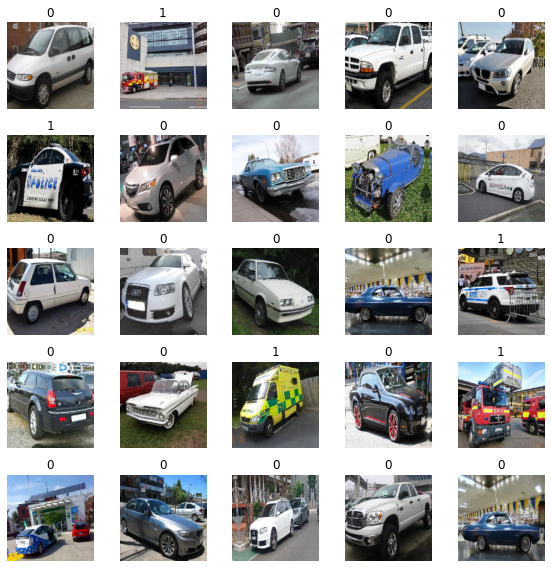

In [54]:
print("\nSample images in a batch:")
training_data1.show_batch(rows=5, figsize=(8, 8))

###Importing test data

In [55]:
test_data = pd.read_csv("/content/gdrive/MyDrive/Capstone/Sumit_Final/test_vc2kHdQ.csv")

###Test data head

In [56]:
test_data.head()

image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg

###Altering the data

In [57]:
test_data = test_df.iloc[1: , :]

###Defining test data path

In [58]:
testdata_path = "/content/gdrive/MyDrive/Capstone/Sumit_Final/train/images"

Adding the test dataset for the predictions.

In [59]:
test_data1 = ImageList.from_df(test_data, testdata_path)

In [60]:
training_data1.add_test(test_data1)

###The model which will be best fit will be RestNet101 as it already has previous set weights and trained on million of images.

In [61]:

model_rnet = cnn_learner(training_data1, models.resnet101, metrics = [error_rate,accuracy], pretrained = True)

model_rnet.summary()

model_rnet.fit_one_cycle(15)

###Plotting the Resnet Model

Min numerical gradient: 2.66E-04
Min loss divided by 10: 8.23E-07


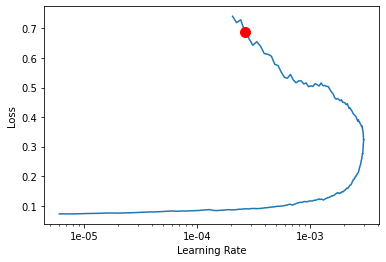

In [62]:
model_rnet.recorder.plot(suggestion=True)

###Getting the optimal learning rate

In [63]:
opt_lr = model_rnet.recorder.min_grad_lr
print("\n Optimum learning rate to be used: ", opt_lr)


 Optimum learning rate to be used:  0.00026573657332919914


### We will stop at 9 epochs because we can acheive the maximum accuracy for our model and after that the accuracy is declining and the model is overfitting. 

###Plotting the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix: Model_rnet')

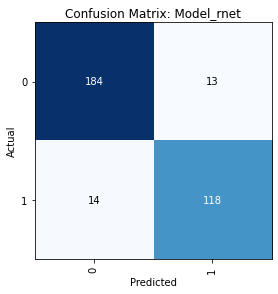

In [65]:
from fastai.metrics import ConfusionMatrix
confusionmatrix = ClassificationInterpretation.from_learner(model_rnet)
confusionmatrix.plot_confusion_matrix()
plt.title("Confusion Matrix: Model_rnet")

### Images for the top losses that confused the ResNet model.

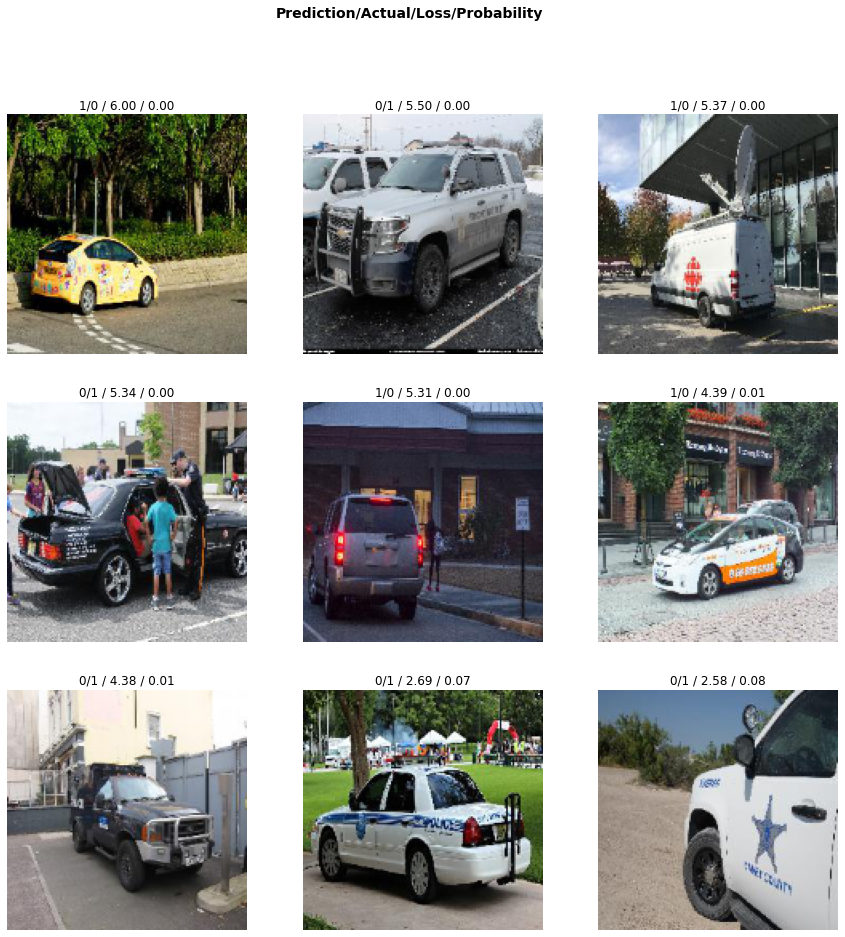

In [66]:
confusionmatrix.plot_top_losses(9, figsize=(15,15))

### Results for the output predictions.

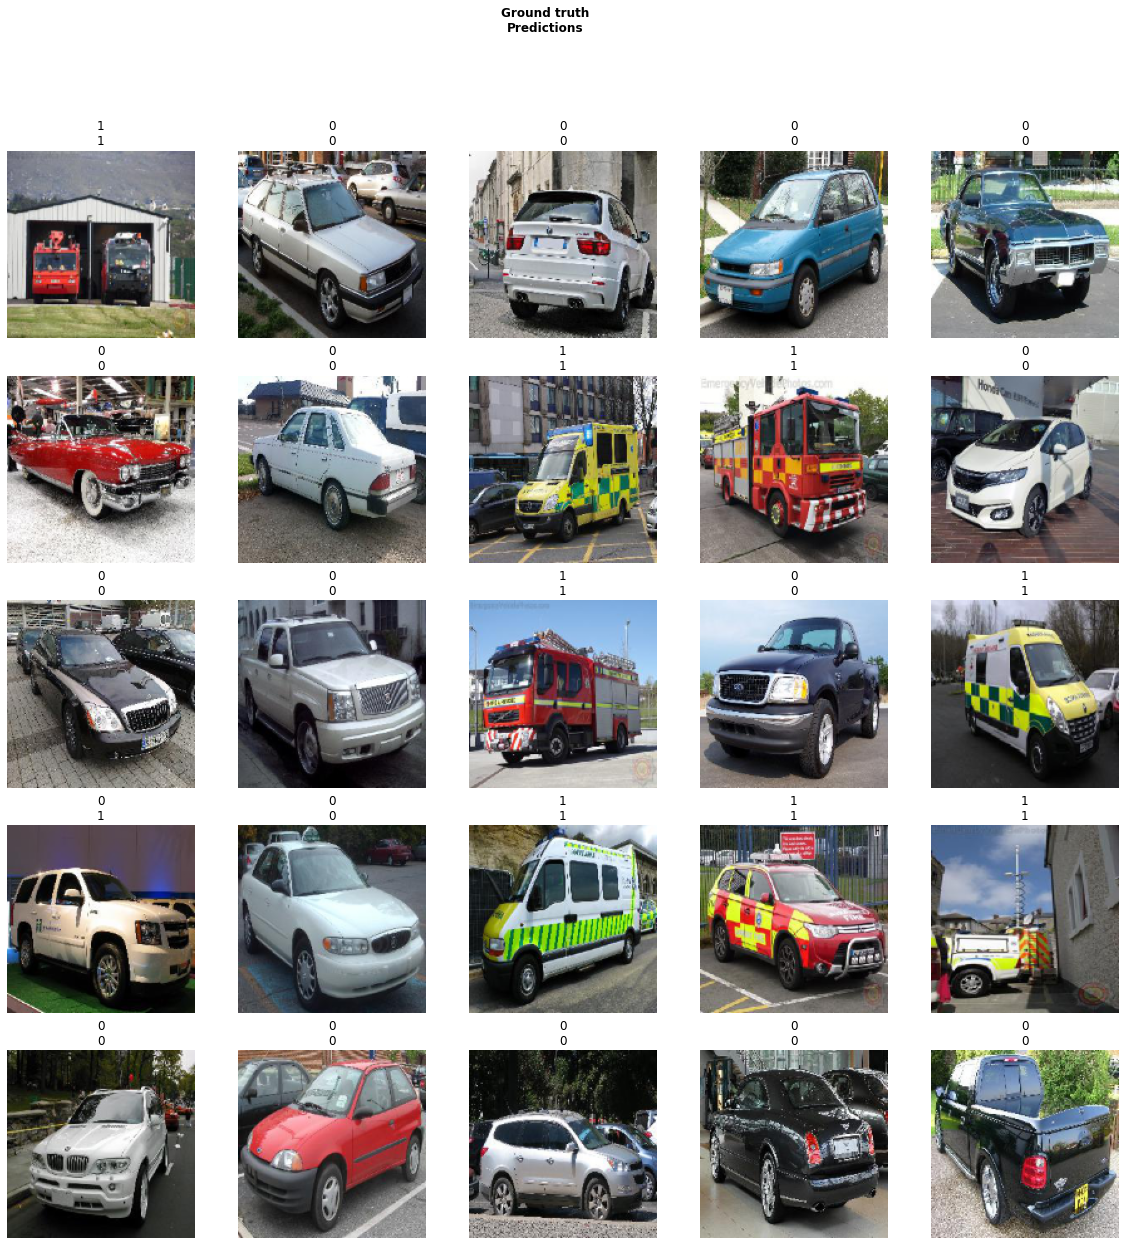

In [68]:
model_rnet.show_results()

###Making predictions on the test dataset.

In [71]:
predictions, *_ = model_rnet.get_preds(DatasetType.Test)

In [72]:
labels = np.argmax(predictions, 1)

In [78]:
test_data['emergency_or_not'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
test_data.head(10)

image_names  emergency_or_not
2     2082.jpg                 0
3      808.jpg                 1
4     1907.jpg                 0
5      350.jpg                 1
6     1557.jpg                 0
7      111.jpg                 1
8     1952.jpg                 0
9     1466.jpg                 0
10    2071.jpg                 0
11    1891.jpg                 0

###Saving the final output in Drive and acheiving the maximum accuracy of 93.31 %. 

In [80]:
test_data.to_csv("/content/gdrive/MyDrive/Capstone/Sumit_Final/Solution01.csv", index= False)